In [19]:
#importing all useful libraries
#mainly we use pandas and sklearn

import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

# Define lists of possible values for each parameter
dosage_values = [50, 75, 100]
sex_values = ['M', 'F']
recovered_values = [0, 1]

# Create an empty DataFrame to hold the toy dataset
df = pd.DataFrame(columns=['Age', 'Dosage', 'Sex', 'Recovered'])

# Generate random data for drug trial
for i in range(10000):  # Generate 10000 rows
    age = random.randint(18, 90)
    if age <= 40:
        recovery_prob = random.uniform(0.95, 1)
    elif age <= 60:
        recovery_prob = random.uniform(0.6, 0.8)
    else:
        recovery_prob = random.uniform(0, 0.1)
    dosage = random.choice(dosage_values)
    sex = random.choice(sex_values)
    if sex == 'M':
        # Men have a lower probability of recovery 
        if random.random() < 0.7:
            recovered = 1 if random.random() < recovery_prob * 0.7 else 0
        else:
            recovered = 1 if random.random() < recovery_prob * 0.8 else 0
    else:
        # Women have a higher probability of recovery 
        if random.random() < 0.8:
            recovered = 1 if random.random() < recovery_prob * 0.8 else 0
        else:
            recovered = 1 if random.random() < recovery_prob * 0.7 else 0
    df = df.append({'Age': age,
                    'Dosage': dosage,
                    'Sex': sex,
                    'Recovered': recovered}, ignore_index=True)

# Print the generated dataset
print(df)

# Convert 'Sex' to numerical values
df['Sex'] = df['Sex'].map({'M': 0, 'F': 1})

# Split data into training and testing sets
X = df[['Age', 'Dosage', 'Sex']]
y = df['Recovered']
y = y.astype('int') # Convert y to integer type
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Create and fit the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Create and fit the SVM model
svm_model = svm.SVC(kernel='rbf', gamma = 0.5, C=10)
svm_model.fit(X_train, y_train)

# Evaluate models
print('Logistic Regression Training Accuracy:', logreg.score(X_train, y_train))
print('Logistic Regression Testing Accuracy:', logreg.score(X_test, y_test))
print('SVM Training Accuracy:', svm_model.score(X_train, y_train))
print('SVM Testing Accuracy:', svm_model.score(X_test, y_test))


# Generate a new dataset
new_data = pd.DataFrame(columns=['Age', 'Dosage', 'Sex'])

for i in range(1000):  # Generate 10000 rows for the new dataset
    age_group = random.choices([1, 2, 3], weights=[60, 30, 10], k=1)[0]  # Assign weights to age groups
    if age_group == 1:
        age = random.randint(18, 40)
    elif age_group == 2:
        age = random.randint(41, 60)
    else:
        age = random.randint(61, 90)
        
    dosage = random.choice(dosage_values)
    sex = random.choice(sex_values)
    new_data = new_data.append({'Age': age,
                                'Dosage': dosage,
                                'Sex': sex}, ignore_index=True)
# Preprocess the new data
new_data['Sex'] = new_data['Sex'].map({'M': 0, 'F': 1})

# Use the svm_model to predict the output
predictions = svm_model.predict(new_data)



# Print the new data and predictions
print("New Data:")
print(new_data)
print("\nPredictions:")
print(predictions)

new_data['Predicted_Recovered'] = predictions

#for comparison curve
###new_data_A['Predicted_Recovered'] = predictions

# Compute the recovery rate
recovery_rate = new_data['Predicted_Recovered'].sum() / len(new_data) * 100
recovery_rate_A = new_data['Predicted_Recovered'].sum() / len(new_data) * 100

# Print the recovery rate
print(f"Recovery Rate: {recovery_rate:.2f}%")

     Age Dosage Sex Recovered
0     52     75   F         0
1     35     50   M         1
2     83     75   F         0
3     48    100   M         0
4     90     50   F         0
...   ..    ...  ..       ...
9995  43     50   F         1
9996  43    100   F         1
9997  42     75   M         0
9998  46     50   F         1
9999  71     75   M         0

[10000 rows x 4 columns]
Logistic Regression Training Accuracy: 0.761
Logistic Regression Testing Accuracy: 0.762
SVM Training Accuracy: 0.7866666666666666
SVM Testing Accuracy: 0.749
New Data:
    Age Dosage  Sex
0    48     50    1
1    60     75    1
2    23     50    1
3    18     50    0
4    29    100    1
..   ..    ...  ...
995  46     75    1
996  46     50    0
997  89     75    0
998  22     50    0
999  37    100    0

[1000 rows x 3 columns]

Predictions:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0
 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0
 1 1 1 0 1 1 1 1

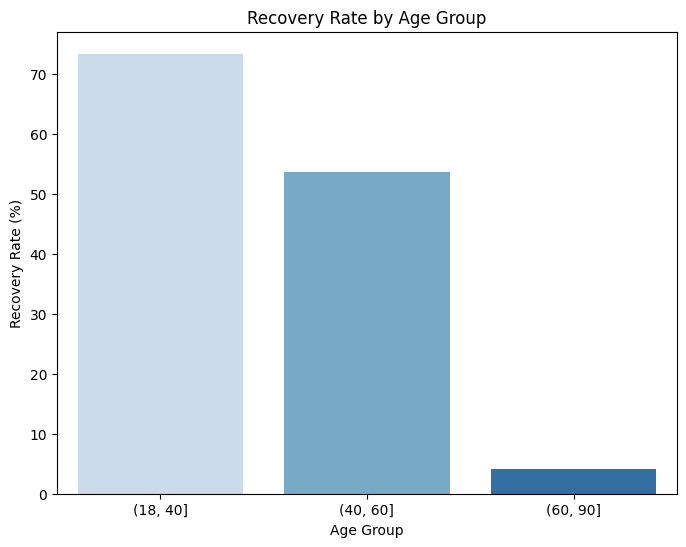

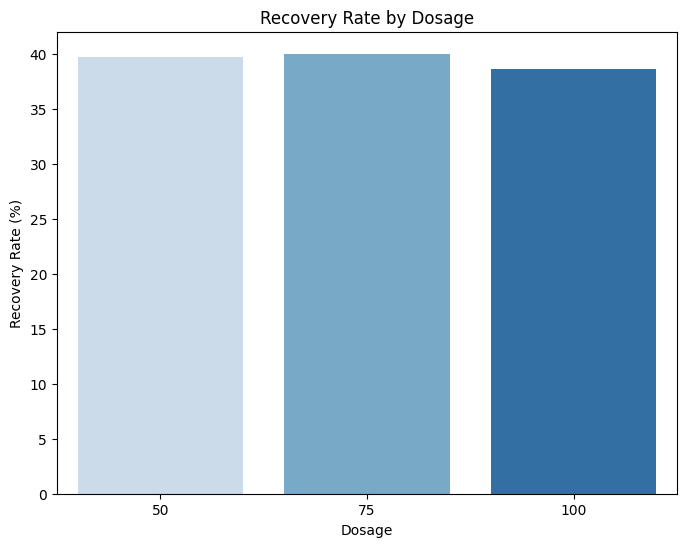

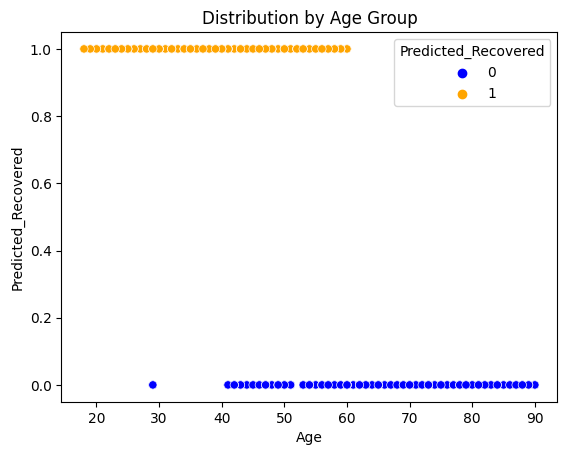

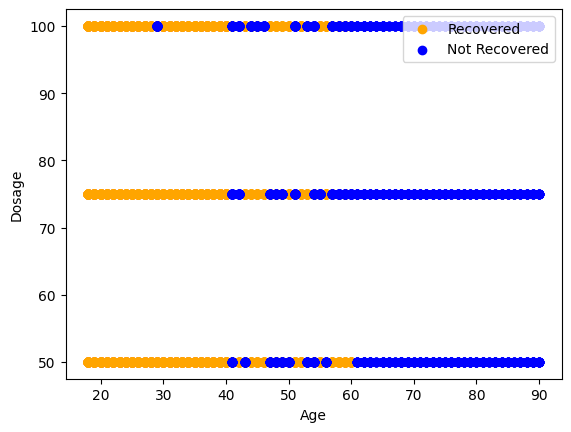

In [ ]:
##Plotting some useful inference from ML model

# Plot recovery rate by age group

# Calculate recovery rate by age group
age_groups = pd.cut(df['Age'], bins=[18, 40, 60, 90])
age_recovery_rates = df.groupby(age_groups)['Recovered'].mean() * 100

plt.figure(figsize=(8,6))
sns.barplot(x=age_recovery_rates.index, y=age_recovery_rates.values, palette='Blues')
plt.title('Recovery Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Recovery Rate (%)')
plt.show()

# Calculate recovery rate by sex
sex_recovery_rates = df.groupby('Sex')['Recovered'].mean() * 100


# Calculate recovery rate by dosage
dosage_recovery_rates = df.groupby('Dosage')['Recovered'].mean() * 100

# Plot recovery rate by dosage
plt.figure(figsize=(8,6))
sns.barplot(x=dosage_recovery_rates.index, y=dosage_recovery_rates.values, palette='Blues')
plt.title('Recovery Rate by Dosage')
plt.xlabel('Dosage')
plt.ylabel('Recovery Rate (%)')
plt.xticks([0, 1, 2], ['50', '75', '100'])
plt.show()


# Plot distribution by age group
sns.scatterplot(data=new_data, x='Age', y='Predicted_Recovered', hue='Predicted_Recovered', palette={0: 'blue', 1: 'orange'})
plt.title('Distribution by Age Group')
plt.show()



# Plot distribution of recovered vs not recovered
recovered = new_data[new_data['Predicted_Recovered'] == 1]
not_recovered = new_data[new_data['Predicted_Recovered'] == 0]
plt.scatter(recovered['Age'], recovered['Dosage'], color='orange', label='Recovered')
plt.scatter(not_recovered['Age'], not_recovered['Dosage'], color='blue', label='Not Recovered')
plt.xlabel('Age')
plt.ylabel('Dosage')
plt.legend()
plt.show()

     Age Dosage Sex Recovered
0     69     50   M         1
1     50     75   F         0
2     74     75   M         0
3     53     75   F         1
4     79     50   M         1
...   ..    ...  ..       ...
1995  76    100   M         1
1996  77    100   F         1
1997  89    100   F         1
1998  57    100   F         1
1999  68    100   M         0

[2000 rows x 4 columns]
Logistic Regression Training Accuracy: 0.6366666666666667
Logistic Regression Testing Accuracy: 0.64
SVM Training Accuracy: 0.7388888888888889
SVM Testing Accuracy: 0.635
New Data:
    Age Dosage  Sex
0    39    100    1
1    62    100    0
2    72     75    1
3    58     75    0
4    50     75    0
..   ..    ...  ...
995  20     75    0
996  68     50    0
997  39     50    1
998  35     75    1
999  36    100    0

[1000 rows x 3 columns]

Predictions:
[0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0
 1 1 

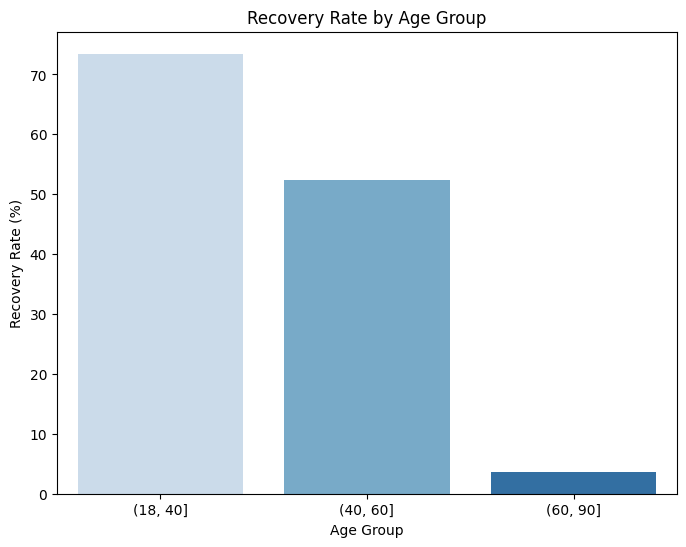

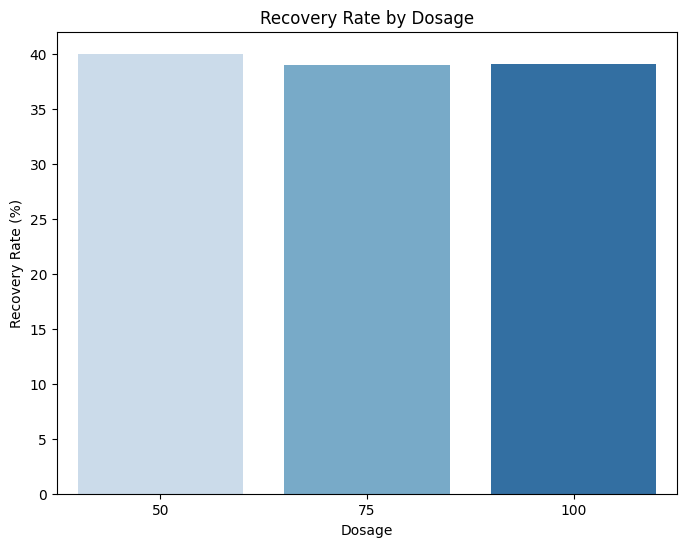

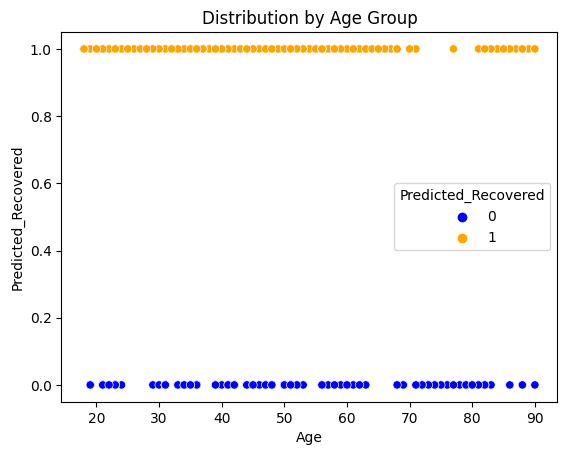

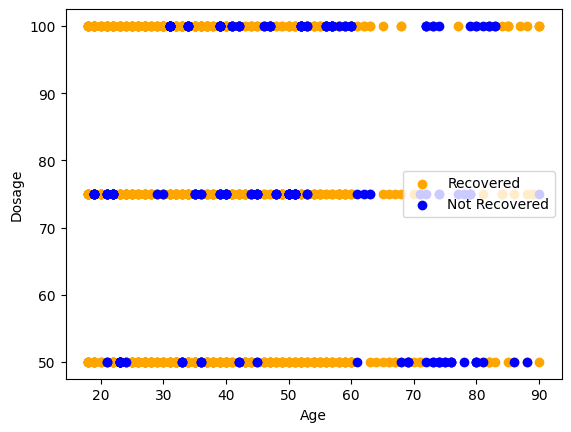

In [21]:
# Create Another data which is better drug , this could be either A or B
# but in the spirit of the question we name it as df_A

df_A = pd.DataFrame(columns=['Age', 'Dosage', 'Sex', 'Recovered'])

# Generate random data for drug trial
for i in range(2000):  # Generate 1000 rows
    age = random.randint(18, 90)
    if age <= 40:
        recovery_prob = random.uniform(0.99, 1)
    elif age <= 60:
        recovery_prob = random.uniform(0.9, 1)
    else:
        recovery_prob = random.uniform(0.5, 0.8)
    dosage = random.choice(dosage_values)
    sex = random.choice(sex_values)
    if sex == 'M':
        # Men have a lower probability of recovery 
        if random.random() < 0.7:
            recovered = 1 if random.random() < recovery_prob * 0.7 else 0
        else:
            recovered = 1 if random.random() < recovery_prob * 0.8 else 0
    else:
        # Women have a higher probability of recovery 
        if random.random() < 0.8:
            recovered = 1 if random.random() < recovery_prob * 0.8 else 0
        else:
            recovered = 1 if random.random() < recovery_prob * 0.7 else 0
    df_A = df_A.append({'Age': age,
                    'Dosage': dosage,
                    'Sex': sex,
                    'Recovered': recovered}, ignore_index=True)

print(df_A)

df_A['Sex'] = df_A['Sex'].map({'M': 0, 'F': 1})

# Split data into training and testing sets
X = df_A[['Age', 'Dosage', 'Sex']]
y = df_A['Recovered']
y = y.astype('int') # Convert y to integer type
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Create and fit the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Create and fit the SVM model
svm_model = svm.SVC(kernel='rbf', gamma = 0.5, C=10)
svm_model.fit(X_train, y_train)

# Evaluate models
print('Logistic Regression Training Accuracy:', logreg.score(X_train, y_train))
print('Logistic Regression Testing Accuracy:', logreg.score(X_test, y_test))
print('SVM Training Accuracy:', svm_model.score(X_train, y_train))
print('SVM Testing Accuracy:', svm_model.score(X_test, y_test))

# Generate a new dataset
new_data = pd.DataFrame(columns=['Age', 'Dosage', 'Sex'])

for i in range(1000):  # Generate 10000 rows for the new dataset
    age_group = random.choices([1, 2, 3], weights=[60, 30, 10], k=1)[0]  # Assign weights to age groups
    if age_group == 1:
        age = random.randint(18, 40)
    elif age_group == 2:
        age = random.randint(41, 60)
    else:
        age = random.randint(61, 90)
        
    dosage = random.choice(dosage_values)
    sex = random.choice(sex_values)
    new_data = new_data.append({'Age': age,
                                'Dosage': dosage,
                                'Sex': sex}, ignore_index=True)
# Preprocess the new data
new_data['Sex'] = new_data['Sex'].map({'M': 0, 'F': 1})

# Use the svm_model to predict the output
predictions = svm_model.predict(new_data)



# Print the new data and predictions
print("New Data:")
print(new_data)
print("\nPredictions:")
print(predictions)

new_data['Predicted_Recovered'] = predictions

# Compute the recovery rate
recovery_rate = new_data['Predicted_Recovered'].sum() / len(new_data) * 100
recovery_rate_B = new_data['Predicted_Recovered'].sum() / len(new_data) * 100
# Print the recovery rate
print(f"Recovery Rate: {recovery_rate:.2f}%")


##Plotting some useful inference from ML model

# Plot recovery rate by age group

# Calculate recovery rate by age group
age_groups = pd.cut(df['Age'], bins=[18, 40, 60, 90])
age_recovery_rates = df.groupby(age_groups)['Recovered'].mean() * 100

plt.figure(figsize=(8,6))
sns.barplot(x=age_recovery_rates.index, y=age_recovery_rates.values, palette='Blues')
plt.title('Recovery Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Recovery Rate (%)')
plt.show()

# Calculate recovery rate by sex
sex_recovery_rates = df.groupby('Sex')['Recovered'].mean() * 100


# Calculate recovery rate by dosage
dosage_recovery_rates = df.groupby('Dosage')['Recovered'].mean() * 100

# Plot recovery rate by dosage
plt.figure(figsize=(8,6))
sns.barplot(x=dosage_recovery_rates.index, y=dosage_recovery_rates.values, palette='Blues')
plt.title('Recovery Rate by Dosage')
plt.xlabel('Dosage')
plt.ylabel('Recovery Rate (%)')
plt.xticks([0, 1, 2], ['50', '75', '100'])
plt.show()


# Plot distribution by age group
sns.scatterplot(data=new_data, x='Age', y='Predicted_Recovered', hue='Predicted_Recovered', palette={0: 'blue', 1: 'orange'})
plt.title('Distribution by Age Group')
plt.show()



# Plot distribution of recovered vs not recovered
recovered = new_data[new_data['Predicted_Recovered'] == 1]
not_recovered = new_data[new_data['Predicted_Recovered'] == 0]
plt.scatter(recovered['Age'], recovered['Dosage'], color='orange', label='Recovered')
plt.scatter(not_recovered['Age'], not_recovered['Dosage'], color='blue', label='Not Recovered')
plt.xlabel('Age')
plt.ylabel('Dosage')
plt.legend()
plt.show()

     Age Dosage Sex Recovered
0     84     50   F         1
1     69    100   F         0
2     42    100   M         1
3     75     50   F         1
4     27     75   M         1
...   ..    ...  ..       ...
1995  26    100   M         1
1996  49     50   F         1
1997  56     50   F         1
1998  25     50   M         1
1999  75     75   F         1

[2000 rows x 4 columns]
Logistic Regression Training Accuracy: 0.6566666666666666
Logistic Regression Testing Accuracy: 0.675
SVM Training Accuracy: 0.7444444444444445
SVM Testing Accuracy: 0.55
New Data:
     Age Dosage  Sex
0     22     75    1
1     53     75    0
2     22    100    0
3     30     75    0
4     22    100    1
...   ..    ...  ...
9995  21    100    1
9996  27     50    1
9997  23     75    1
9998  21     50    1
9999  40     75    0

[10000 rows x 3 columns]

Predictions:
[1 1 1 ... 1 1 1]
Recovery Rate : 87.87%


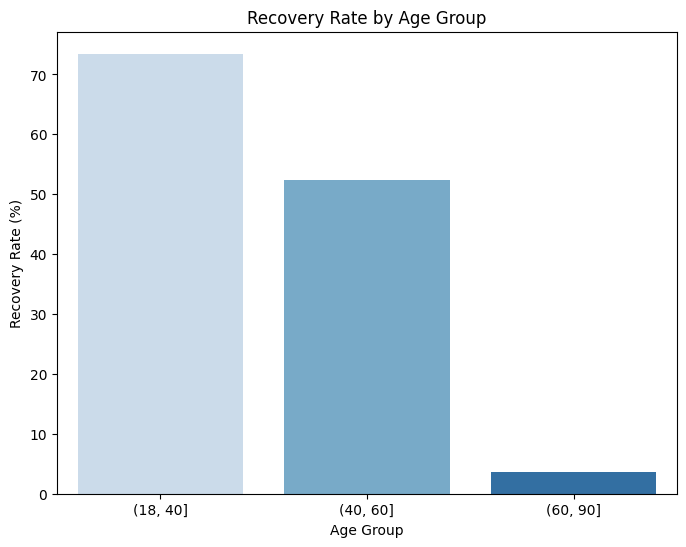

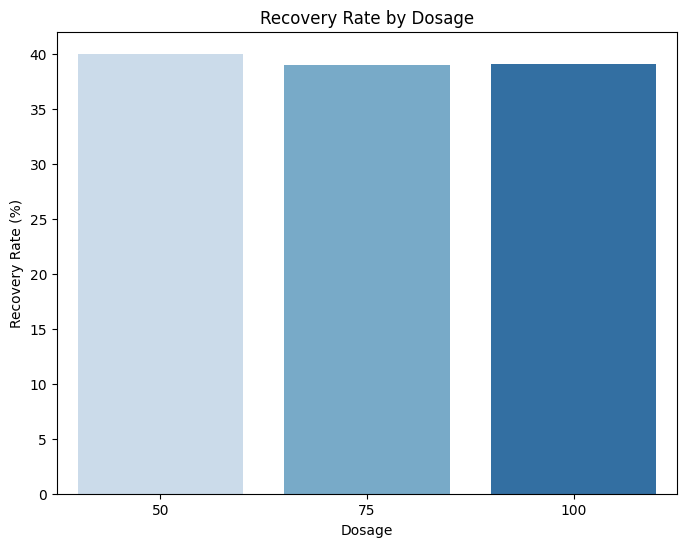

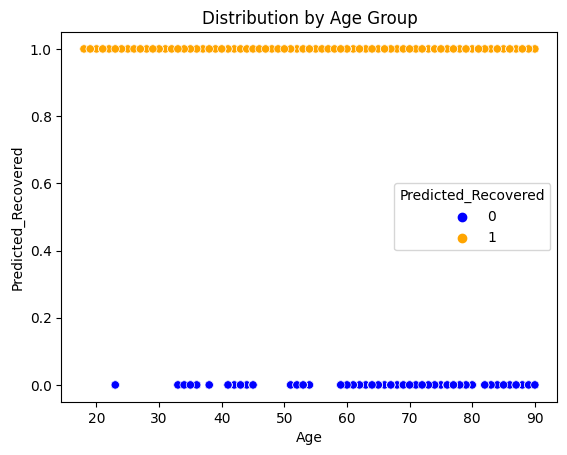

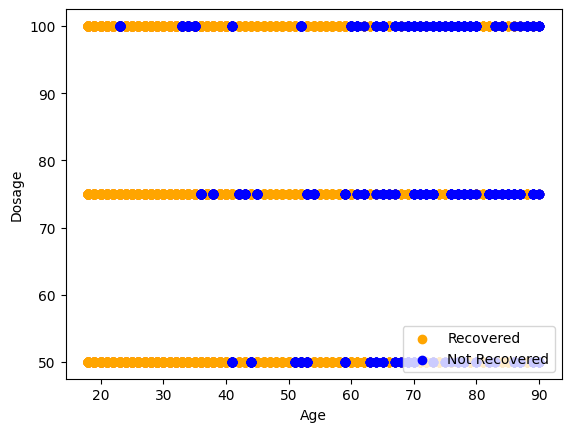

In [22]:
#  Now let us bring a small twist to the problem. Instead of wanting to study whether your drug is better, 
#you want to show using your algorithm that your drug is indeed better. What is #the difference between 
#the above and the current scenario? How will you use the data set you had for the previous problem 
#and obtain a PAC solution which favors drug A?
df_A = pd.DataFrame(columns=['Age', 'Dosage', 'Sex', 'Recovered'])

# Generate random data for drug trial
for i in range(2000):  # Generate 1000 rows
    age = random.randint(18, 90)
    if age <= 40:
        recovery_prob = random.uniform(0.99, 1)
    elif age <= 60:
        recovery_prob = random.uniform(0.9, 1)
    else:
        recovery_prob = random.uniform(0.5, 0.8)
    dosage = random.choice(dosage_values)
    sex = random.choice(sex_values)
    if sex == 'M':
        # Men have a lower probability of recovery 
        if random.random() < 0.7:
            recovered = 1 if random.random() < recovery_prob * 0.7 else 0
        else:
            recovered = 1 if random.random() < recovery_prob * 0.8 else 0
    else:
        # Women have a higher probability of recovery 
        if random.random() < 0.8:
            recovered = 1 if random.random() < recovery_prob * 0.8 else 0
        else:
            recovered = 1 if random.random() < recovery_prob * 0.7 else 0
    df_A = df_A.append({'Age': age,
                    'Dosage': dosage,
                    'Sex': sex,
                    'Recovered': recovered}, ignore_index=True)

print(df_A)


df_A['Sex'] = df_A['Sex'].map({'M': 0, 'F': 1})


######adding bias in trainign testing


# Oversample the Recovered class to introduce bias

# Split the dataframe into two based on the 'Recovered' column
df_recovered = df_A[df_A['Recovered'] == 1]
df_not_recovered = df_A[df_A['Recovered'] == 0]

# Concatenate the two dataframes with the recovered data first
df_A_new = pd.concat([df_recovered, df_not_recovered], axis=0)

# Split the concatenated dataframe into training and testing sets
X = df_A_new[['Age', 'Dosage', 'Sex']]
y = df_A_new['Recovered']
y = y.astype('int')
#randm state is put 0 so that data is not shuffled 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# Create and fit the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Create and fit the SVM model
svm_model = svm.SVC(kernel='rbf', gamma = 0.5, C=10)
svm_model.fit(X_train, y_train)

# Evaluate models
print('Logistic Regression Training Accuracy:', logreg.score(X_train, y_train))
print('Logistic Regression Testing Accuracy:', logreg.score(X_test, y_test))
print('SVM Training Accuracy:', svm_model.score(X_train, y_train))
print('SVM Testing Accuracy:', svm_model.score(X_test, y_test))

# Generate a new dataset
new_data = pd.DataFrame(columns=['Age', 'Dosage', 'Sex'])

for i in range(10000):  # Generate 10000 rows for the new dataset
    age_group = random.choices([1, 2, 3], weights=[60, 30, 10], k=1)[0]  # Assign weights to age groups
    if age_group == 1:
        age = random.randint(18, 40)
    elif age_group == 2:
        age = random.randint(41, 60)
    else:
        age = random.randint(61, 90)
        
    dosage = random.choice(dosage_values)
    sex = random.choice(sex_values)
    new_data = new_data.append({'Age': age,
                                'Dosage': dosage,
                                'Sex': sex}, ignore_index=True)
# Preprocess the new data
new_data['Sex'] = new_data['Sex'].map({'M': 0, 'F': 1})

# Use the svm_model to predict the output
predictions = svm_model.predict(new_data)



# Print the new data and predictions
print("New Data:")
print(new_data)
print("\nPredictions:")
print(predictions)
new_data['Predicted_Recovered'] = predictions
# Compute the recovery rate
recovery_rate = new_data['Predicted_Recovered'].sum() / len(new_data) * 100
recovery_rate_A_biased = new_data['Predicted_Recovered'].sum() / len(new_data) * 100

# Print the recovery rate
print(f"Recovery Rate : {recovery_rate:.2f}%")

##Plotting some useful inference from ML model

# Plot recovery rate by age group

# Calculate recovery rate by age group
age_groups = pd.cut(df['Age'], bins=[18, 40, 60, 90])
age_recovery_rates = df.groupby(age_groups)['Recovered'].mean() * 100

plt.figure(figsize=(8,6))
sns.barplot(x=age_recovery_rates.index, y=age_recovery_rates.values, palette='Blues')
plt.title('Recovery Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Recovery Rate (%)')
plt.show()

# Calculate recovery rate by sex
sex_recovery_rates = df.groupby('Sex')['Recovered'].mean() * 100


# Calculate recovery rate by dosage
dosage_recovery_rates = df.groupby('Dosage')['Recovered'].mean() * 100

# Plot recovery rate by dosage
plt.figure(figsize=(8,6))
sns.barplot(x=dosage_recovery_rates.index, y=dosage_recovery_rates.values, palette='Blues')
plt.title('Recovery Rate by Dosage')
plt.xlabel('Dosage')
plt.ylabel('Recovery Rate (%)')
plt.xticks([0, 1, 2], ['50', '75', '100'])
plt.show()


# Plot distribution by age group
sns.scatterplot(data=new_data, x='Age', y='Predicted_Recovered', hue='Predicted_Recovered', palette={0: 'blue', 1: 'orange'})
plt.title('Distribution by Age Group')
plt.show()



# Plot distribution of recovered vs not recovered
recovered = new_data[new_data['Predicted_Recovered'] == 1]
not_recovered = new_data[new_data['Predicted_Recovered'] == 0]
plt.scatter(recovered['Age'], recovered['Dosage'], color='orange', label='Recovered')
plt.scatter(not_recovered['Age'], not_recovered['Dosage'], color='blue', label='Not Recovered')
plt.xlabel('Age')
plt.ylabel('Dosage')
plt.legend()
plt.show()

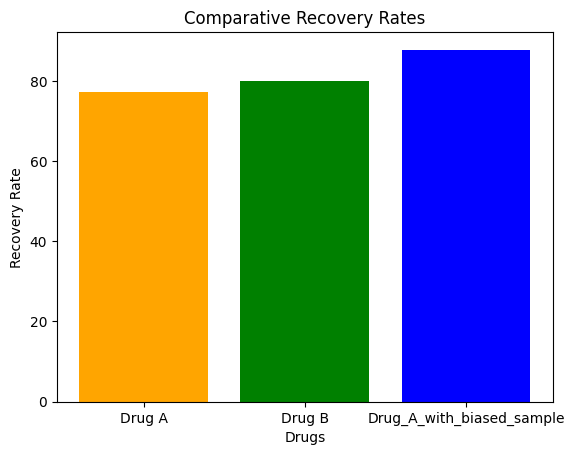

In [23]:
import matplotlib.pyplot as plt



# Create a bar chart of the recovery rates
recovery_rate_A = recovery_rate_A
recovery_rate_B = recovery_rate_B
recovery_rate_A_biased = recovery_rate_A_biased

##recovery_rate_A_biased
rates = [recovery_rate_A, recovery_rate_B, recovery_rate_A_biased]
labels = ['Drug A', 'Drug B', 'Drug_A_with_biased_sample']
colors = ['orange', 'green', 'blue']
plt.bar(labels, rates, color=colors)

# Add axis labels and title
plt.xlabel('Drugs')
plt.ylabel('Recovery Rate')
plt.title('Comparative Recovery Rates')

# Show the plot
plt.show()